In [4]:
import cv2
import numpy as np
import os
import mediapipe as mp

# Initialize Mediapipe models
mp_holistic = mp.solutions.holistic   # Holistic model
mp_drawing = mp.solutions.drawing_utils   # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

# Define your parameters here
DATA_PATH = 'MPData'  # Base path for saving data
actions = ['me', 'father', 'mother', 'help', 'eat food', 'learn'] # List of actions (phrases)
no_sequences = 20 # Number of sequences (videos) per action
sequence_length = 30  # Length of each video (number of frames)

# Ensure the base folder exists
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Ensure subfolders for each action exist
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Mark the image as non-writeable
    results = model.process(image)                  # Process the image with the model
    image.flags.writeable = True                    # Mark the image as writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw landmarks with styling
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [6]:
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)


In [8]:
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)


In [10]:


def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Mark the image as non-writeable
    results = model.process(image)                  # Process the image with the model
    image.flags.writeable = True                    # Mark the image as writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw landmarks with styling
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])




In [19]:
import time  # Import time for waiting between action groups

# Start capturing video
cap = cv2.VideoCapture(0)

# Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Process actions in groups of three
    group_size = 1
    for group_start in range(0, len(actions), group_size):
        # Get a subset of actions (up to 3 actions per group)
        action_group = actions[group_start:group_start + group_size]
        
        print(f"Starting action group: {action_group}")
        
        for action in action_group:
            # Create directory for the action
            os.makedirs(os.path.join(DATA_PATH, action), exist_ok=True)
            
            # Loop through sequences aka videos
            for sequence in range(no_sequences):
                # Create directory for the sequence
                sequence_path = os.path.join(DATA_PATH, action, str(sequence))
                os.makedirs(sequence_path, exist_ok=True)

                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()
                    if not ret:
                        print("Failed to capture frame. Exiting...")
                        cap.release()
                        cv2.destroyAllWindows()
                        break

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    draw_styled_landmarks(image, results)
                    
                    # Display wait message on the first frame
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(2000)  # Wait for 2 seconds before starting the sequence
                    else: 
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)

                    # Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence))
                    npy_file_path = os.path.join(npy_path, str(frame_num) + '.npy')
                    np.save(npy_file_path, keypoints)  # Save keypoints

                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
        
        print(f"Completed group: {action_group}. Please prepare for the next set of actions.")
        # Show preparation message and wait before the next group
        cv2.putText(frame, "Prepare for next actions...", (100, 300), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('OpenCV Feed', frame)
        cv2.waitKey(20000)  # Wait for 40 seconds between action groups

cap.release()
cv2.destroyAllWindows()

print("Data collection complete.")


Starting action group: ['me', 'father', 'mother']


C:\Users\Admin\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Completed group: ['me', 'father', 'mother']. Please prepare for the next set of actions.
Starting action group: ['help', 'eat food', 'learn']
Completed group: ['help', 'eat food', 'learn']. Please prepare for the next set of actions.
Data collection complete.


In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
label_map = {label:num for num, label in enumerate(actions)}
label_map
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [20]:
np.array(sequences).shape

(120, 30, 1662)

In [22]:
y = to_categorical(labels).astype(int)

In [24]:
y = to_categorical(labels).astype(int)
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [28]:
y_test.shape

(6, 6)

In [30]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
 

In [32]:
len(actions)

6

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [36]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

modell = Sequential()
modell.add(Input(shape=(30, 1662)))  # Input shape for one video (sequence)
modell.add(LSTM(64, return_sequences=True, activation='relu'))
modell.add(LSTM(128, return_sequences=True, activation='relu'))
modell.add(LSTM(64, return_sequences=False, activation='relu'))
modell.add(Dense(64, activation='relu'))
modell.add(Dense(32, activation='relu'))
modell.add(Dense(len(actions), activation='softmax'))

modell.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [42]:

modell.fit(X_train, y_train, epochs=65, callbacks=[tb_callback])

Epoch 1/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - categorical_accuracy: 0.2658 - loss: 1.7642
Epoch 2/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - categorical_accuracy: 0.2116 - loss: 1.7600
Epoch 3/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - categorical_accuracy: 0.2242 - loss: 1.6045
Epoch 4/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.1792 - loss: 2.0547
Epoch 5/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.2946 - loss: 1.9639
Epoch 6/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - categorical_accuracy: 0.2493 - loss: 1.7640
Epoch 7/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - categorical_accuracy: 0.1894 - loss: 1.9257
Epoch 8/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - categorical_accuracy: 0.1480 - loss: 1.8233
Epoch 9/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - categorical_accuracy: 0.2610 - loss: 1.7535
Epoch 10/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - categorical_accuracy: 0.3728 - loss: 1.6543
Epoch 11/65
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

In [44]:
modell.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,324 (6.83 MB)

 Trainable params: 596,774 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,550 (4.55 MB)

In [46]:
res = modell.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


In [50]:
actions[np.argmax(res[1])]


'mother'

In [52]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [54]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
loss, accuracy = modell.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step - categorical_accuracy: 0.8333 - loss: 0.5636
Test Accuracy: 83.33%


In [56]:
actions[np.argmax(y_test[1])]

'mother'

In [60]:
yhat = modell.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [62]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [64]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 1],
        [0, 0]],

       [[3, 0],
        [1, 2]],

       [[5, 0],
        [0, 1]],

       [[4, 0],
        [0, 2]]], dtype=int64)

In [68]:
modell.save("proj.keras")

In [70]:
from scipy import stats
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import mediapipe as mp

In [72]:
from scipy import stats
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import mediapipe as mp


# Generate enough colors dynamically based on the number of actions
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]  # Base colors
colors = colors * ((len(actions) // len(colors)) + 1)  # Repeat colors as needed
colors = colors[:len(actions)]  # Trim to match the number of actions

def prob_viz(res, actions, input_frame, colors):
    """
    Visualizes the probabilities for each action on the input frame.

    Parameters:
    - res: Probabilities predicted by the model for each action.
    - actions: List of action labels.
    - input_frame: The frame where the visualization is applied.
    - colors: List of colors for visualizing each action.
    """
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # Use modulo to avoid IndexError if colors list is shorter than res
        color = colors[num % len(colors)]
        # Draw probability bar and label
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), color, -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame


In [74]:
from scipy import stats
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import mediapipe as mp


# Generate enough colors dynamically based on the number of actions
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]  # Base colors
colors = colors * ((len(actions) // len(colors)) + 1)  # Repeat colors as needed
colors = colors[:len(actions)]  # Trim to match the number of actions

def prob_viz(res, actions, input_frame, colors):
    """
    Visualizes the probabilities for each action on the input frame.

    Parameters:
    - res: Probabilities predicted by the model for each action.
    - actions: List of action labels.
    - input_frame: The frame where the visualization is applied.
    - colors: List of colors for visualizing each action.
    """
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # Use modulo to avoid IndexError if colors list is shorter than res
        color = colors[num % len(colors)]
        # Draw probability bar and label
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), color, -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1800x1800 with 0 Axes>

In [76]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model  # Ensure the model is in the same directory or specify the path

# Initialize MediaPipe components
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the trained model
model = load_model('pro.keras')

# Define actions (update as per your model's output)
actions = ['me', 'father', 'mother', 'help', 'eat food', 'learn']

# Generate colors dynamically
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)] * ((len(actions) // 3) + 1)
colors = colors[:len(actions)]

# Helper functions
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Non-writeable for efficiency
    results = model.process(image)                  # Process the image
    image.flags.writeable = True                    # Make it writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw face, pose, and hands landmarks with different styles
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num % len(colors)], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Main video capture loop
cap = cv2.VideoCapture(0)
sequence = []
sentence = []
predictions = []
threshold = 0.5

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Exit loop if no frame is captured

        # Process the frame
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Extract keypoints and make predictions
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep the last 30 frames only

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            # If consistent predictions, append to sentence
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if not sentence or actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualize probabilities
            if len(res) == len(actions):  # Ensure res matches actions
                image = prob_viz(res, actions, image, colors)

        # Display the sentence on the image
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the output
        cv2.imshow('Sign Language Recognition', image)

        # Break gracefully on 'q' key press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


C:\Users\Admin\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

In [3]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model
import pyttsx3
import time

# Initialize MediaPipe components
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the trained model
model = load_model('pro.keras')

# Define actions (update as per your model's output)
actions = ['me', 'father', 'mother', 'help', 'eat food', 'learn']

# Generate colors dynamically
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)] * ((len(actions) // 3) + 1)
colors = colors[:len(actions)]

# Initialize text-to-speech engine
engine = pyttsx3.init()

# Helper functions
def mediapipe_detection(image, holistic_model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = holistic_model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results


def draw_styled_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                  mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))


def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in
                     results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in
                     results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in
                   results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in
                   results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(
        21 * 3)
    return np.concatenate([pose, face, lh, rh])


def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num % len(colors)], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                    cv2.LINE_AA)
    return output_frame


# Capture video input
cap = cv2.VideoCapture(0)

sequence = []
predictions = []
threshold = 0.5
last_speech = ""
current_word = ""  # Variable to store the most recent recognized word

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Process the frame
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Extract keypoints and make predictions
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep the last 30 frames only

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            # If consistent predictions, get the most recent action
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    current_action = actions[np.argmax(res)]

                    # Only update the displayed word if the action has changed
                    if current_action != current_word:
                        current_word = current_action

                    # Visualize probabilities
                    image = prob_viz(res, actions, image, colors)

                    # Display the current action persistently
                    cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
                    cv2.putText(image, current_word, (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                                cv2.LINE_AA)

                    # Optional: Use text-to-speech to announce the recognized sign language gesture
                    if current_word != last_speech:
                        engine.say(current_word)
                        engine.runAndWait()
                        last_speech = current_word

        # Display the frame
        cv2.imshow("Sign Language Recognition", image)

        
        # Break gracefully if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━

In [78]:
import os
import numpy as np
import cv2
import mediapipe as mp
from tensorflow.keras.models import load_model
import pyttsx3

# Initialize MediaPipe components
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the trained model
model = load_model('pro.keras')

# Define actions
actions = ['me', 'father', 'mother', 'help', 'eat food', 'learn']
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)] * ((len(actions) // 3) + 1)
colors = colors[:len(actions)]

# Initialize text-to-speech engine
engine = pyttsx3.init()

# Helper functions
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks(image, results):
    # Add stylish landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

def prob_viz(res, actions, input_frame, colors):
    overlay = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(overlay, (10, 60 + num * 40), (10 + int(prob * 300), 90 + num * 40), colors[num % len(colors)], -1)
        cv2.putText(overlay, f'{actions[num]}: {prob:.2f}', (15, 85 + num * 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)
    return cv2.addWeighted(overlay, 0.6, input_frame, 0.4, 0)

# Main video capture loop
cap = cv2.VideoCapture(0)
sequence = []
sentence = []
predictions = []
threshold = 0.5

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Process frame
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Keypoints extraction
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    action = actions[np.argmax(res)]
                    if not sentence or action != sentence[-1]:
                        sentence.append(action)

                        # Speak the recognized action
                        engine.say(action)
                        engine.runAndWait()

            if len(sentence) > 5:
                sentence = sentence[-5:]

            if len(res) == len(actions):
                image = prob_viz(res, actions, image, colors)

        # Display sentence and title
        cv2.rectangle(image, (0, 0), (800, 50), (245, 117, 16), -1)
        cv2.putText(image, "Sign Language Recognition", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(image, ' '.join(sentence), (10, 80),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show frame
        cv2.imshow('Sign Language Recognition', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [1]:
import cv2
import numpy as np
import os
import mediapipe as mp

# Initialize Mediapipe models
mp_holistic = mp.solutions.holistic   # Holistic model
mp_drawing = mp.solutions.drawing_utils   # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

# Define your parameters here
DATA_PATH = 'helptrain'  # Base path for saving data
actions = [ 'help'] # List of actions (phrases)
no_sequences = 20 # Number of sequences (videos) per action
sequence_length = 30  # Length of each video (number of frames)

# Ensure the base folder exists
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Ensure subfolders for each action exist
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Mark the image as non-writeable
    results = model.process(image)                  # Process the image with the model
    image.flags.writeable = True                    # Mark the image as writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw landmarks with styling
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [2]:
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)


In [3]:
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)


In [4]:


def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Mark the image as non-writeable
    results = model.process(image)                  # Process the image with the model
    image.flags.writeable = True                    # Mark the image as writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw landmarks with styling
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])




In [9]:
import time  # Import time for waiting between action groups

# Start capturing video
cap = cv2.VideoCapture(0)

# Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Process actions in groups of three
    group_size = 1
    for group_start in range(0, len(actions), group_size):
        # Get a subset of actions (up to 3 actions per group)
        action_group = actions[group_start:group_start + group_size]
        
        print(f"Starting action group: {action_group}")
        
        for action in action_group:
            # Create directory for the action
            os.makedirs(os.path.join(DATA_PATH, action), exist_ok=True)
            
            # Loop through sequences aka videos
            for sequence in range(no_sequences):
                # Create directory for the sequence
                sequence_path = os.path.join(DATA_PATH, action, str(sequence))
                os.makedirs(sequence_path, exist_ok=True)

                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()
                    if not ret:
                        print("Failed to capture frame. Exiting...")
                        cap.release()
                        cv2.destroyAllWindows()
                        break

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    draw_styled_landmarks(image, results)
                    
                    # Display wait message on the first frame
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(2000)  # Wait for 2 seconds before starting the sequence
                    else: 
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)

                    # Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence))
                    npy_file_path = os.path.join(npy_path, str(frame_num) + '.npy')
                    np.save(npy_file_path, keypoints)  # Save keypoints

                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
        
        print(f"Completed group: {action_group}. Please prepare for the next set of actions.")
        # Show preparation message and wait before the next group
        cv2.putText(frame, "Prepare for next actions...", (100, 300), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('OpenCV Feed', frame)
        cv2.waitKey(20000)  # Wait for 40 seconds between action groups

cap.release()
cv2.destroyAllWindows()

print("Data collection complete.")


Starting action group: ['help']


C:\Users\Admin\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Completed group: ['help']. Please prepare for the next set of actions.
Data collection complete.


In [11]:
from tensorflow.keras.utils import to_categorical

In [13]:
label_map = {label:num for num, label in enumerate(actions)}
label_map
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [15]:
np.array(sequences).shape

(20, 30, 1662)

In [17]:
np.array(sequences).shape

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [19]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [29]:
len(actions)

1

In [31]:
print(actions)

['help']


In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Dropout



# Define the model
model_h = Sequential()
model_h.add(Input(shape=(30, 1662)))  # Input shape for one sequence
model_h.add(LSTM(32, return_sequences=True, activation='relu'))  # Reduce LSTM units
model_h.add(Dropout(0.3))  # Add dropout to prevent overfitting
model_h.add(LSTM(64, return_sequences=False, activation='relu'))
model_h.add(Dense(32, activation='relu'))
model_h.add(Dropout(0.3))  # Another dropout layer
model_h.add(Dense(1, activation='sigmoid'))   # Output layer

# Compile the model
model_h.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

print(model_h.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 30, 32)              │         216,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,905 (952.75 KB)

 Trainable params: 243,905 (952.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [51]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [53]:

model_h.fit(X, y, epochs=15, callbacks=[tb_callback])

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00


In [55]:
# Define your parameters here
DATA_PATH = 'helptest'  # Base path for saving data
actions = [ 'help'] # List of actions (phrases)
no_sequences = 20 # Number of sequences (videos) per action
sequence_length = 30  # Length of each video (number of frames)


In [57]:
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)


In [59]:
label_map = {label:num for num, label in enumerate(actions)}
label_map
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [61]:
np.array(sequences).shape

(20, 30, 1662)

In [63]:
X_test = np.array(sequences)
y_test= to_categorical(labels).astype(int)

In [87]:
import numpy as np



# Evaluate the model on the test dataset
test_loss, test_accuracy = model_h.evaluate(X_test, y_test, verbose=1)

# Print test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Optionally, make predictions
predictions = model_h.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Print some sample predictions and ground truth for comparison
for i in range(10):  # Print first 10 predictions
    print(f"Prediction: {predicted_labels[i]}, Ground Truth: {y_test[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0
Test Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Prediction: [0], Ground Truth: [1]
Prediction: [0], Ground Truth: [1]
Prediction: [0], Ground Truth: [1]
Prediction: [0], Ground Truth: [1]
Prediction: [0], Ground Truth: [1]
Prediction: [0], Ground Truth: [1]
Prediction: [0], Ground Truth: [1]
Prediction: [0], Ground Truth: [1]
Prediction: [0], Ground Truth: [1]
Prediction: [0], Ground Truth: [1]


In [89]:
model_h.save("help.keras")

In [91]:
from scipy import stats
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import mediapipe as mp


# Generate enough colors dynamically based on the number of actions
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]  # Base colors
colors = colors * ((len(actions) // len(colors)) + 1)  # Repeat colors as needed
colors = colors[:len(actions)]  # Trim to match the number of actions

def prob_viz(res, actions, input_frame, colors):
    """
    Visualizes the probabilities for each action on the input frame.

    Parameters:
    - res: Probabilities predicted by the model for each action.
    - actions: List of action labels.
    - input_frame: The frame where the visualization is applied.
    - colors: List of colors for visualizing each action.
    """
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # Use modulo to avoid IndexError if colors list is shorter than res
        color = colors[num % len(colors)]
        # Draw probability bar and label
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), color, -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame


In [93]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: 'numpy.float32' object is not iterable

<Figure size 1800x1800 with 0 Axes>

In [85]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# Initialize MediaPipe components
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the trained model
model = load_model('help.keras')

# Define the action for the single sign language gesture
action = 'help'

# Helper functions
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Non-writeable for efficiency
    results = model.process(image)                  # Process the image
    image.flags.writeable = True                    # Make it writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw face, pose, and hands landmarks with different styles
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

# Main video capture loop
cap = cv2.VideoCapture(0)
sequence = []
sentence = []
threshold = 0.5

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Exit loop if no frame is captured

        # Process the frame
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Extract keypoints and make predictions
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep the last 30 frames only

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0][0]  # Single probability
            if res > threshold:  # Check if the probability exceeds the threshold
                if not sentence or sentence[-1] != action:
                    sentence.append(action)
            else:
                sentence.clear()

            # Visualize the prediction
            cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, 'Recognized: ' + (action if res > threshold else 'None'), (3, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the output
        cv2.imshow('Sign Language Recognition', image)

        # Break gracefully on 'q' key press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

In [106]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# Initialize MediaPipe components
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the trained model
model = load_model('help.keras')

# Define the action for the single sign language gesture
action = 'help'

# Helper functions
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Non-writeable for efficiency
    results = model.process(image)                  # Process the image
    image.flags.writeable = True                    # Make it writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw face, pose, and hands landmarks with different styles
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

def prob_viz(prob, action, input_frame, color):
    """
    Visualizes the probability for a single action on the input frame.

    Parameters:
    - prob: The probability of the action.
    - action: The name of the action.
    - input_frame: The video frame to overlay the visualization on.
    - color: The color for visualizing the action probability.
    """
    output_frame = input_frame.copy()
    # Draw the probability bar and label
    cv2.rectangle(output_frame, (0, 60), (int(prob * 640), 90), color, -1)
    cv2.putText(output_frame, f'{action}: {prob:.2f}', (3, 85),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Main video capture loop
cap = cv2.VideoCapture(0)
sequence = []
sentence = []
threshold = 0.6

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Exit loop if no frame is captured

        # Process the frame
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Extract keypoints and make predictions
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep the last 30 frames only

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0][0]  # Single probability
            if res > threshold:  # Check if the probability exceeds the threshold
                if not sentence or sentence[-1] != action:
                    sentence.append(action)
            else:
                sentence.clear()

            # Visualize the prediction
            image = prob_viz(res, action, image, (245, 117, 16))

        # Show the output
        cv2.imshow('Sign Language Recognition', image)

        # Break gracefully on 'q' key press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [109]:
import cv2
import numpy as np
import os
import mediapipe as mp

# Initialize Mediapipe models
mp_holistic = mp.solutions.holistic   # Holistic model
mp_drawing = mp.solutions.drawing_utils   # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

# Define your parameters here
DATA_PATH = 'helptrain'  # Base path for saving data
actions = [ 'help_train'] # List of actions (phrases)
no_sequences = 30 # Number of sequences (videos) per action
sequence_length = 40  # Length of each video (number of frames)

# Ensure the base folder exists
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Ensure subfolders for each action exist
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Mark the image as non-writeable
    results = model.process(image)                  # Process the image with the model
    image.flags.writeable = True                    # Mark the image as writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw landmarks with styling
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [111]:
import os
import time  # Import time for waiting between action groups
import cv2
import numpy as np
import mediapipe as mp

# Set Mediapipe components
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils


DATA_PATH = 'helptrain'  # Base path for saving data
actions = [ 'help_train'] # List of actions (phrases)
no_sequences = 30 # Number of sequences (videos) per action
sequence_length = 40  # Length of each video (number of frames)
batch_size = 10  # Number of videos each person records before a break

# Helper functions
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks(image, results):
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, lh, rh])

# Start video capture
cap = cv2.VideoCapture(0)

# Initialize Mediapipe Holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        os.makedirs(os.path.join(DATA_PATH, action), exist_ok=True)
        
        # Loop through sequences (videos)
        for sequence in range(no_sequences):
            if sequence % batch_size == 0 and sequence != 0:
                print(f"Batch {sequence // batch_size} complete. Waiting for the next person to start...")
                cv2.putText(frame, "Prepare for the next person...", (50, 300), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', frame)
                cv2.waitKey(20000)  # Wait for 20 seconds between batches

            sequence_path = os.path.join(DATA_PATH, action, str(sequence))
            os.makedirs(sequence_path, exist_ok=True)

            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                if not ret:
                    print("Failed to capture frame. Exiting...")
                    cap.release()
                    cv2.destroyAllWindows()
                    break

                # Process the frame
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)

                # Display messages on the first frame of the sequence
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)  # Wait 2 seconds before starting sequence
                else:
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_file_path = os.path.join(sequence_path, str(frame_num) + '.npy')
                np.save(npy_file_path, keypoints)

                # Break gracefully on 'q' key press
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()

print("Data collection complete.")


Batch 1 complete. Waiting for the next person to start...
Batch 2 complete. Waiting for the next person to start...
Data collection complete.


In [185]:
label_map = {label:num for num, label in enumerate(actions)}
label_map
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [186]:
np.array(sequences).shape

(30, 40, 258)

In [189]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [191]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [193]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [195]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [199]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Dropout
from keras.optimizers import Adam

# Define the model
model_hel = Sequential()
model_hel.add(Input(shape=(40, 258)))   # Input shape for one sequence
model_hel.add(LSTM(64, return_sequences=True, activation='relu'))  # Increased units
model_hel.add(Dropout(0.3))  # Reduced dropout rate
model_hel.add(LSTM(128, return_sequences=False, activation='relu'))  # Increased units
model_hel.add(Dense(64, activation='relu'))  # Added more Dense units
model_hel.add(Dropout(0.3))  # Reduced dropout rate
model_hel.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model_hel.compile(optimizer=Adam(learning_rate=0.0001), 
                   loss='categorical_crossentropy', 
                   metrics=['categorical_accuracy'])

print(model_hel.summary())


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 40, 64)              │          82,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 40, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189,825 (741.50 KB)

 Trainable params: 189,825 (741.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [203]:

model_hel.fit(X_train, y_train, epochs=30, callbacks=[tb_callback])

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00


In [211]:
# Assuming you have a trained model and test data (x_test, y_test)

# Evaluate the model on the test set
loss, accuracy = model_hel.evaluate(X_test, y_test, batch_size=32)

# Print the results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Optionally, you can also make predictions on the test set
predictions = model_hel.predict(X_test)

# If your model is a binary classifier (e.g., predicting 0 or 1), you can round the predictions
predictions = (predictions > 0.5)  # This converts the probabilities to 0 or 1

# If you want to see some of the predictions along with the true labels
for i in range(2):  # Show 5 sample predictions
    print(f"True Label: {y_test[i]}, Predicted: {predictions[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - categorical_accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0
Test Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
True Label: [1], Predicted: [ True]
True Label: [1], Predicted: [ True]


In [213]:
model_hel.save("help_40.keras")

In [47]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model
import pyttsx3  # Text-to-Speech library for voice feedback

# Initialize MediaPipe components
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the trained model
model = load_model('help.keras')

# Define actions
actions = ['help']

# Generate colors dynamically
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)] * ((len(actions) // 3) + 1)
colors = colors[:len(actions)]

# Initialize Text-to-Speech engine
engine = pyttsx3.init()

# Helper functions
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Non-writeable for efficiency
    results = model.process(image)                  # Process the image
    image.flags.writeable = True                    # Make it writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num % len(colors)], -1)
        cv2.putText(output_frame, f"{actions[num]}: {prob:.2f}", (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Main video capture loop
cap = cv2.VideoCapture(0)
sequence = []
sentence = []
predictions = []
threshold = 0.3
spoken_action = None  # To track the last spoken action

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Process the frame
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Extract keypoints and make predictions
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep the last 30 frames only

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            # If consistent predictions, append to sentence
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    action = actions[np.argmax(res)]
                    confidence = res[np.argmax(res)]
                    if not sentence or action != sentence[-1]:
                        sentence.append(action)

                    # Voice feedback for new actions
                    if action != spoken_action:
                        spoken_action = action
                        engine.say(f"{action} with {confidence:.2f} confidence")
                        engine.runAndWait()

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualize probabilities
            if len(res) == len(actions):  # Ensure res matches actions
                image = prob_viz(res, actions, image, colors)

        # Display the sentence on the image
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        if sentence:
            cv2.putText(image, f"{sentence[-1]} ({res[np.argmax(res)]:.2f})", (3, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the output
        cv2.imshow('Sign Language Recognition', image)

        # Break gracefully on 'q' key press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━

In [1]:
import cv2
import numpy as np
import os
import mediapipe as mp

# Initialize Mediapipe models
mp_holistic = mp.solutions.holistic   # Holistic model
mp_drawing = mp.solutions.drawing_utils   # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

# Define your parameters here
DATA_PATH = 'eat_learn'  # Base path for saving data
actions = ['eat food', 'learn'] # List of actions (phrases)
no_sequences = 20 # Number of sequences (videos) per action
sequence_length = 30  # Length of each video (number of frames)

# Ensure the base folder exists
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Ensure subfolders for each action exist
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Mark the image as non-writeable
    results = model.process(image)                  # Process the image with the model
    image.flags.writeable = True                    # Mark the image as writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw landmarks with styling
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [3]:
import time  # Import time for waiting between action groups

# Start capturing video
cap = cv2.VideoCapture(0)

# Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Process actions in groups of three
    group_size = 1
    for group_start in range(0, len(actions), group_size):
        # Get a subset of actions (up to 3 actions per group)
        action_group = actions[group_start:group_start + group_size]
        
        print(f"Starting action group: {action_group}")
        
        for action in action_group:
            # Create directory for the action
            os.makedirs(os.path.join(DATA_PATH, action), exist_ok=True)
            
            # Loop through sequences aka videos
            for sequence in range(no_sequences):
                # Create directory for the sequence
                sequence_path = os.path.join(DATA_PATH, action, str(sequence))
                os.makedirs(sequence_path, exist_ok=True)

                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()
                    if not ret:
                        print("Failed to capture frame. Exiting...")
                        cap.release()
                        cv2.destroyAllWindows()
                        break

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    draw_styled_landmarks(image, results)
                    
                    # Display wait message on the first frame
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(2000)  # Wait for 2 seconds before starting the sequence
                    else: 
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)

                    # Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence))
                    npy_file_path = os.path.join(npy_path, str(frame_num) + '.npy')
                    np.save(npy_file_path, keypoints)  # Save keypoints

                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
        
        print(f"Completed group: {action_group}. Please prepare for the next set of actions.")
        # Show preparation message and wait before the next group
        cv2.putText(frame, "Prepare for next actions...", (100, 300), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('OpenCV Feed', frame)
        cv2.waitKey(20000)  # Wait for 40 seconds between action groups

cap.release()
cv2.destroyAllWindows()

print("Data collection complete.")


Starting action group: ['eat food']


C:\Users\Admin\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Completed group: ['eat food']. Please prepare for the next set of actions.
Starting action group: ['learn']
Completed group: ['learn']. Please prepare for the next set of actions.
Data collection complete.


In [5]:
label_map = {label:num for num, label in enumerate(actions)}
label_map
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [7]:
np.array(sequences).shape

(40, 30, 1662)

In [13]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [17]:
y = to_categorical(labels).astype(int)
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

model_el = Sequential()
model_el.add(Input(shape=(30, 1662)))  # Input shape for one video (sequence)
model_el.add(LSTM(64, return_sequences=True, activation='relu'))
model_el.add(LSTM(128, return_sequences=True, activation='relu'))
model_el.add(LSTM(64, return_sequences=False, activation='relu'))
model_el.add(Dense(64, activation='relu'))
model_el.add(Dense(32, activation='relu'))
model_el.add(Dense(len(actions), activation='softmax'))

model_el.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [25]:

model_el.fit(X_train, y_train, epochs=15, callbacks=[tb_callback])

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - categorical_accuracy: 0.5384 - loss: 4.0398
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - categorical_accuracy: 0.4825 - loss: 15.5666
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - categorical_accuracy: 0.4408 - loss: 24.6300
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - categorical_accuracy: 0.4265 - loss: 13.4904
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - categorical_accuracy: 0.5488 - loss: 76.2293
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - categorical_accuracy: 0.5175 - loss: 87.4719
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - categorical_accuracy: 0.3882 - loss: 17.9186
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - categorical_accuracy: 0.4825 - loss: 42.4575
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - categorical_accuracy: 0.4792 - loss: 19.9152
Epoch 10/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - categorical_accuracy: 0.5175 - loss: 31.8412
Epoch 11/15
2/2 ━━━━━━━━━━━━━━━━

In [ ]:
model_el.summary()

In [ ]:
res = model_el.predict(X_test)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
loss, accuracy = modell.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - categorical_accuracy: 0.7500 - loss: 1.6460 - val_categorical_accuracy: 0.5000 - val_loss: 1.7489 - learning_rate: 0.0010
Epoch 2/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - categorical_accuracy: 0.6250 - loss: 1.9783 - val_categorical_accuracy: 0.5000 - val_loss: 1.7178 - learning_rate: 0.0010
Epoch 3/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - categorical_accuracy: 0.5208 - loss: 1.9175 - val_categorical_accuracy: 0.5000 - val_loss: 1.9121 - learning_rate: 0.0010
Epoch 4/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - categorical_accuracy: 0.6250 - loss: 1.7505 - val_categorical_accuracy: 0.5000 - val_loss: 7.3601 - learning_rate: 0.0010
Epoch 5/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - categorical_accuracy: 0.6250 - loss: 1.7301 - val_categorical_accuracy: 0.5000 - val_loss: 10.2050 - learning_rate: 0.0010
Epoch 6/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - categorical_accuracy: 0.7083 - loss: 1.7989 - val_categorical_accuracy: 0.5000 

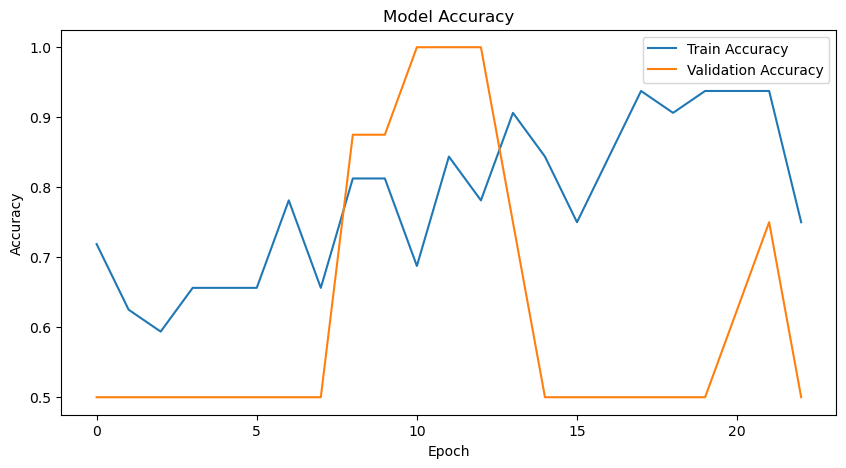

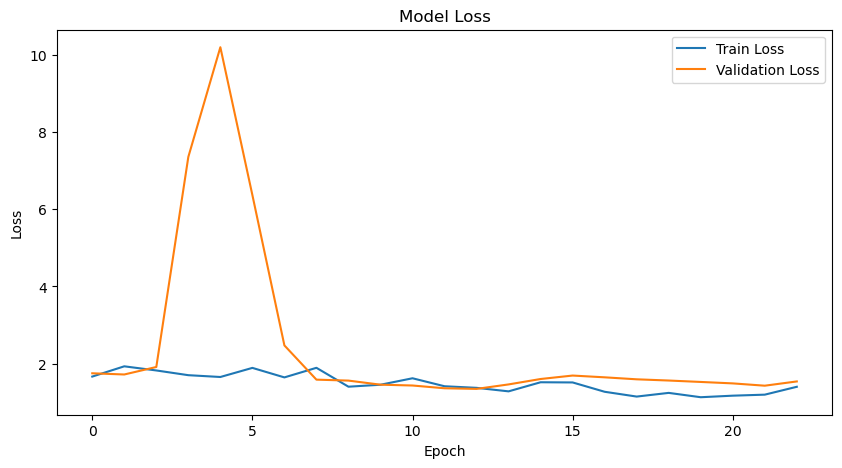

In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Data Preparation
DATA_PATH = 'eat_learn'
actions = ['eat food', 'learn']
sequence_length = 30

# Load data
sequences, labels = [], []
label_map = {label: num for num, label in enumerate(actions)}

for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Normalize keypoints (optional but recommended)
sequences = sequences / np.max(sequences)

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(sequences, labels, test_size=0.2, stratify=labels, random_state=42)

# One-Hot Encoding Labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(actions))
y_val = to_categorical(y_val, num_classes=len(actions))

# Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = dict(enumerate(class_weights))

# Model Definition
model_eat_learn = Sequential()
model_eat_learn.add(Input(shape=(sequence_length, 1662)))  # Input shape for one sequence
model_eat_learn.add(LSTM(64, return_sequences=True, activation='relu'))
model_eat_learn.add(Dropout(0.2))
model_eat_learn.add(LSTM(128, return_sequences=True, activation='relu'))
model_eat_learn.add(Dropout(0.2))
model_eat_learn.add(LSTM(64, return_sequences=False, activation='relu'))
model_eat_learn.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model_eat_learn.add(BatchNormalization())
model_eat_learn.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model_eat_learn.add(BatchNormalization())
model_eat_learn.add(Dense(len(actions), activation='softmax'))

# Compile Model
optimizer = Adam(learning_rate=0.001)
model_eat_learn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train Model
history = model_eat_learn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=70,
    batch_size=16,
    class_weight=class_weights,
    callbacks=[reduce_lr, early_stopping]
)

# Save the Model
model.save("eat_learn.keras")

# Visualize Training Results
# Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [31]:
from scipy import stats
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import mediapipe as mp


# Generate enough colors dynamically based on the number of actions
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]  # Base colors
colors = colors * ((len(actions) // len(colors)) + 1)  # Repeat colors as needed
colors = colors[:len(actions)]  # Trim to match the number of actions

def prob_viz(res, actions, input_frame, colors):
    """
    Visualizes the probabilities for each action on the input frame.

    Parameters:
    - res: Probabilities predicted by the model for each action.
    - actions: List of action labels.
    - input_frame: The frame where the visualization is applied.
    - colors: List of colors for visualizing each action.
    """
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # Use modulo to avoid IndexError if colors list is shorter than res
        color = colors[num % len(colors)]
        # Draw probability bar and label
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), color, -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

In [37]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model  # Ensure the model is in the same directory or specify the path

# Initialize MediaPipe components
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the trained model
model = load_model('eat_learn.keras')

# Define actions (update as per your model's output)
actions = [ 'eat food', 'learn']

# Generate colors dynamically
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)] * ((len(actions) // 3) + 1)
colors = colors[:len(actions)]

# Helper functions
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Non-writeable for efficiency
    results = model.process(image)                  # Process the image
    image.flags.writeable = True                    # Make it writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw face, pose, and hands landmarks with different styles
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num % len(colors)], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Main video capture loop
cap = cv2.VideoCapture(0)
sequence = []
sentence = []
predictions = []
threshold = 0.8

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Exit loop if no frame is captured

        # Process the frame
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Extract keypoints and make predictions
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep the last 30 frames only

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            # If consistent predictions, append to sentence
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if not sentence or actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualize probabilities
            if len(res) == len(actions):  # Ensure res matches actions
                image = prob_viz(res, actions, image, colors)

        # Display the sentence on the image
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the output
        cv2.imshow('Sign Language Recognition', image)

        # Break gracefully on 'q' key press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [39]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model
import pyttsx3  # Text-to-Speech library for voice feedback

# Initialize MediaPipe components
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the trained model
model = load_model('eat_learn.keras')

# Define actions
actions = ['eat food', 'learn']

# Generate colors dynamically
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)] * ((len(actions) // 3) + 1)
colors = colors[:len(actions)]

# Initialize Text-to-Speech engine
engine = pyttsx3.init()

# Helper functions
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Non-writeable for efficiency
    results = model.process(image)                  # Process the image
    image.flags.writeable = True                    # Make it writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

def draw_styled_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num % len(colors)], -1)
        cv2.putText(output_frame, f"{actions[num]}: {prob:.2f}", (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Main video capture loop
cap = cv2.VideoCapture(0)
sequence = []
sentence = []
predictions = []
threshold = 0.8
spoken_action = None  # To track the last spoken action

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Process the frame
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # Extract keypoints and make predictions
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # Keep the last 30 frames only

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            # If consistent predictions, append to sentence
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    action = actions[np.argmax(res)]
                    confidence = res[np.argmax(res)]
                    if not sentence or action != sentence[-1]:
                        sentence.append(action)

                    # Voice feedback for new actions
                    if action != spoken_action:
                        spoken_action = action
                        engine.say(f"{action} with {confidence:.2f} confidence")
                        engine.runAndWait()

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualize probabilities
            if len(res) == len(actions):  # Ensure res matches actions
                image = prob_viz(res, actions, image, colors)

        # Display the sentence on the image
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        if sentence:
            cv2.putText(image, f"{sentence[-1]} ({res[np.argmax(res)]:.2f})", (3, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the output
        cv2.imshow('Sign Language Recognition', image)

        # Break gracefully on 'q' key press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━